# Student Performance Prediction using Supervised Learning

## Predict a student’s exam performance based on:
- Study habits
- Demographics
- Family background

This is a regression problem (scores) and can also be converted into classification (Pass / Fail).

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

### 2. Load Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### 3. Basic EDA

In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### 3.1. Separate Features & Target

In [4]:
X = df.drop("math score", axis=1)
y = df["math score"]

### * Preprocessing (Categorical Encoding)

#### 3.2. Manual Encoding 
- Binary Encoding(Manual)
- One-hot Encoding

In [5]:
# X.gender.unique()
# X['race/ethnicity'].unique()
# X['parental level of education'].unique()
# X['lunch'].unique()
# X['test preparation course'].unique()

X["gender"] = X["gender"].map({"male": 0, "female": 1})
X["lunch"] = X["lunch"].map({"free/reduced": 0, "standard": 1})
X["test preparation course"] = X["test preparation course"].map(
    {"none": 0, "completed": 1}
)

One-hot Encoding....

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.head()

,gender,lunch,test preparation course,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,67,63,False,False,False,False,False,True,False,False,False
1,1,0,0,59,55,False,False,True,False,False,False,False,False,True
2,0,0,0,60,50,False,False,False,True,False,False,False,True,False
3,0,1,0,78,68,True,False,False,False,False,True,False,False,False
4,0,1,1,73,68,False,False,False,True,False,False,False,False,False


### 4. Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 5. Train Model(Linear Regression)

In [9]:
# Convert to NumPy:

X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)


In [10]:
### initialize parameters
n_samples, n_features = X_train_np.shape

W = np.zeros((n_features, 1))  # weights
b = 0                          # bias


In [11]:
### prediction function
def predict(X, W, b):
    return np.dot(X, W) + b


In [12]:
### Loss Function (Mean Squared Error)
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [13]:
### Gradent Descent
def gradient_descent(X, y, W, b, lr, epochs):
    n = X.shape[0]

    for i in range(epochs):
        y_pred = predict(X, W, b)

        dW = (2 / n) * np.dot(X.T, (y_pred - y))
        db = (2 / n) * np.sum(y_pred - y)

        W = W - lr * dW
        b = b - lr * db

        if i % 1000 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {i}, Loss: {loss:.4f}")
        if np.isnan(y_pred).any() or np.isinf(y_pred).any():
            print("Divergence detected")
            break


    return W, b


In [14]:
### Manual Scaling Code
import numpy as np

# 1. Select numeric columns ONLY
numeric_cols = ['reading score', 'writing score']

X_train_num = X_train[numeric_cols].values.astype(float)
X_test_num  = X_test[numeric_cols].values.astype(float)

# 2. Compute mean and standard deviation (TRAINING ONLY)
mean = np.mean(X_train_num, axis=0)
std  = np.std(X_train_num, axis=0)

# Avoid division by zero
std[std == 0] = 1

# 3. Apply standard scaling
X_train_scaled = (X_train_num - mean) / std
X_test_scaled  = (X_test_num  - mean) / std

# 4. (Optional) Verify scaling
print("Train mean:", X_train_scaled.mean(axis=0))
print("Train std :", X_train_scaled.std(axis=0))


Train mean: [2.33146835e-16 1.15463195e-16]
Train std : [1. 1.]


In [15]:
# reinitialzizing the weights
W = np.zeros((X_train_scaled.shape[1], 1))
b = 0


In [16]:
### Train the Model
# learning_rate = 0.0001
# epochs = 66000

# W, b = gradient_descent(
#     X_train_np,
#     y_train_np,
#     W,
#     b,
#     learning_rate,
#     epochs
# )

# Train again
W, b = gradient_descent(
    X_train_scaled,
    y_train_np,
    W,
    b,
    lr=0.01,
    epochs=66000
)



Epoch 0, Loss: 4623.1862
Epoch 1000, Loss: 76.4321
Epoch 2000, Loss: 76.3746
Epoch 3000, Loss: 76.3657
Epoch 4000, Loss: 76.3643
Epoch 5000, Loss: 76.3641
Epoch 6000, Loss: 76.3641
Epoch 7000, Loss: 76.3641
Epoch 8000, Loss: 76.3641
Epoch 9000, Loss: 76.3641
Epoch 10000, Loss: 76.3641
Epoch 11000, Loss: 76.3641
Epoch 12000, Loss: 76.3641
Epoch 13000, Loss: 76.3641
Epoch 14000, Loss: 76.3641
Epoch 15000, Loss: 76.3641
Epoch 16000, Loss: 76.3641
Epoch 17000, Loss: 76.3641
Epoch 18000, Loss: 76.3641
Epoch 19000, Loss: 76.3641
Epoch 20000, Loss: 76.3641
Epoch 21000, Loss: 76.3641
Epoch 22000, Loss: 76.3641
Epoch 23000, Loss: 76.3641
Epoch 24000, Loss: 76.3641
Epoch 25000, Loss: 76.3641
Epoch 26000, Loss: 76.3641
Epoch 27000, Loss: 76.3641
Epoch 28000, Loss: 76.3641
Epoch 29000, Loss: 76.3641
Epoch 30000, Loss: 76.3641
Epoch 31000, Loss: 76.3641
Epoch 32000, Loss: 76.3641
Epoch 33000, Loss: 76.3641
Epoch 34000, Loss: 76.3641
Epoch 35000, Loss: 76.3641
Epoch 36000, Loss: 76.3641
Epoch 37000,

### 7. Prediction

In [17]:
# y_pred_test = predict(X_test_np, W, b)
y_pred_test = predict(X_test_scaled, W, b)

### 8. Evaluation

In [18]:
### manual R2 calculation

# y_test_np : actual values
# y_pred    : predicted values from your model

y_mean = np.mean(y_test_np)

SS_res = np.sum((y_test_np - y_pred_test) ** 2)
SS_tot = np.sum((y_test_np - y_mean) ** 2)

mae = np.mean(np.abs(y_test_np - y_pred_test))
rmse = np.sqrt(np.mean((y_test_np - y_pred_test) ** 2))
r2 = 1 - (SS_res / SS_tot)


print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 6.847407687698157
RMSE: 8.748696394233901
R2 Score: 0.672988053490292


# Applying Polynomial regresion from scratch :
* First: What Problem Are We Solving?
      Linear Regression assumes:
        y=wx+b
      But real-world relationships are often curved, not straight.
      Example intuition:
    - Small study time → little improvement
    - Medium study time → big improvement
    - Very high study time → plateau
            
That curve cannot be captured by a straight line.

## 🎯 Core Idea of Polynomial Regression

- Polynomial Regression is NOT a new algorithm.

- It is:

    - Linear Regression on transformed features

Example:
    y = w1x+w2x^2+b

Still linear in weights, but non-linear in x.

#### to understand polynomial regression properly we start with ONE feature only
    - i.e reading score -> input
    - math score -> output

In [19]:
# Use reading score only
X = df[["reading score"]].values
y = df["math score"].values.reshape(-1, 1)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# Manual Feature Scaling
mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std


In [22]:
# feature tranformation
X_train_poly = np.hstack([
    X_train_scaled,
    X_train_scaled ** 2
])

X_test_poly = np.hstack([
    X_test_scaled,
    X_test_scaled ** 2
])

In [23]:
## polyno. reg. with degree 3
X_train_poly3 = np.hstack([
    X_train_scaled,
    X_train_scaled ** 2,
    X_train_scaled ** 3
])

X_test_poly3 = np.hstack([
    X_test_scaled,
    X_test_scaled ** 2,
    X_test_scaled ** 3
])



In [24]:
W = np.zeros((X_train_poly.shape[1], 1))
b = 0

W, b = gradient_descent(
    X_train_poly,
    y_train,
    W,
    b,
    lr=0.01,
    epochs=66000
)


Epoch 0, Loss: 4623.1862
Epoch 1000, Loss: 77.9449
Epoch 2000, Loss: 77.9449
Epoch 3000, Loss: 77.9449
Epoch 4000, Loss: 77.9449
Epoch 5000, Loss: 77.9449
Epoch 6000, Loss: 77.9449
Epoch 7000, Loss: 77.9449
Epoch 8000, Loss: 77.9449
Epoch 9000, Loss: 77.9449
Epoch 10000, Loss: 77.9449
Epoch 11000, Loss: 77.9449
Epoch 12000, Loss: 77.9449
Epoch 13000, Loss: 77.9449
Epoch 14000, Loss: 77.9449
Epoch 15000, Loss: 77.9449
Epoch 16000, Loss: 77.9449
Epoch 17000, Loss: 77.9449
Epoch 18000, Loss: 77.9449
Epoch 19000, Loss: 77.9449
Epoch 20000, Loss: 77.9449
Epoch 21000, Loss: 77.9449
Epoch 22000, Loss: 77.9449
Epoch 23000, Loss: 77.9449
Epoch 24000, Loss: 77.9449
Epoch 25000, Loss: 77.9449
Epoch 26000, Loss: 77.9449
Epoch 27000, Loss: 77.9449
Epoch 28000, Loss: 77.9449
Epoch 29000, Loss: 77.9449
Epoch 30000, Loss: 77.9449
Epoch 31000, Loss: 77.9449
Epoch 32000, Loss: 77.9449
Epoch 33000, Loss: 77.9449
Epoch 34000, Loss: 77.9449
Epoch 35000, Loss: 77.9449
Epoch 36000, Loss: 77.9449
Epoch 37000,

In [25]:
y_pred = predict(X_test_poly, W, b)

mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print("Polynomial MAE:", mae)
print("Polynomial RMSE:", rmse)


Polynomial MAE: 6.908315377643365
Polynomial RMSE: 8.838861287540496


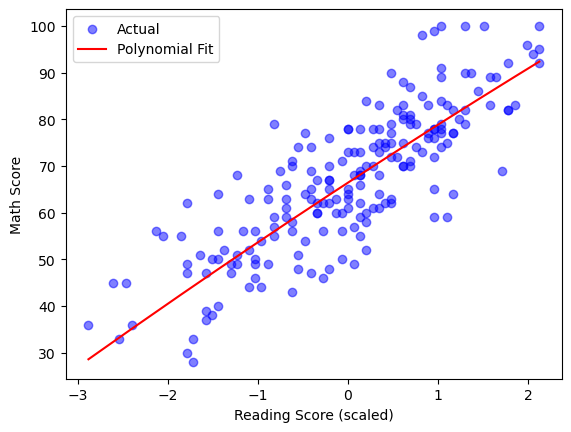

In [26]:
# Sort for clean plotting
sorted_idx = np.argsort(X_test_scaled.flatten())
X_sorted = X_test_scaled[sorted_idx]
y_sorted = y_test[sorted_idx]

y_pred_sorted = y_pred[sorted_idx]

import matplotlib.pyplot as plt

plt.scatter(X_test_scaled, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_sorted, y_pred_sorted, color='red', label="Polynomial Fit")
plt.xlabel("Reading Score (scaled)")
plt.ylabel("Math Score")
plt.legend()
plt.show()


Polynomial regression is linear regression applied to polynomially expanded features. The algorithm remains linear in parameters but models non-linear relationships.

Interpretation:

- Training error ↓
- Test error stays same or ↑
- Curve becomes wiggly

That’s overfitting starting.